<b>NOTE</b>: This notebook is my understanding of second chapter of `Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow 2nd Edition` book written by `Aurelien Geron`, entitled as `End-to-End Machine Learning Project`. 
While most of the code blocks have been copied from the chapter's notebook, the arraingment and changes made to the whole project is personalized based on my knowledge and what I comprehended and learned from the book.

`Aurelien Geron`'s Github repository for the book can be found [here](https://github.com/ageron/handson-ml2).

--------------------------------------------------------------------------------------------------------------------------------

# Objective

In this project we try to build a model of housing prices in California using the California census
data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. `median_house_value` is our target feature.

# Getting and exploring the data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint

In [2]:
current_working_directory = os.getcwd().replace('\\','\\\\')
housing = pd.read_csv(current_working_directory + '\\housing.csv')

In [3]:
housing.shape

(20640, 10)

In [4]:
housing.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As can be seen, we have few missing values in `total_bedrooms` attribute.
Besides, the only categorical feature is `ocean_proximity`.

In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

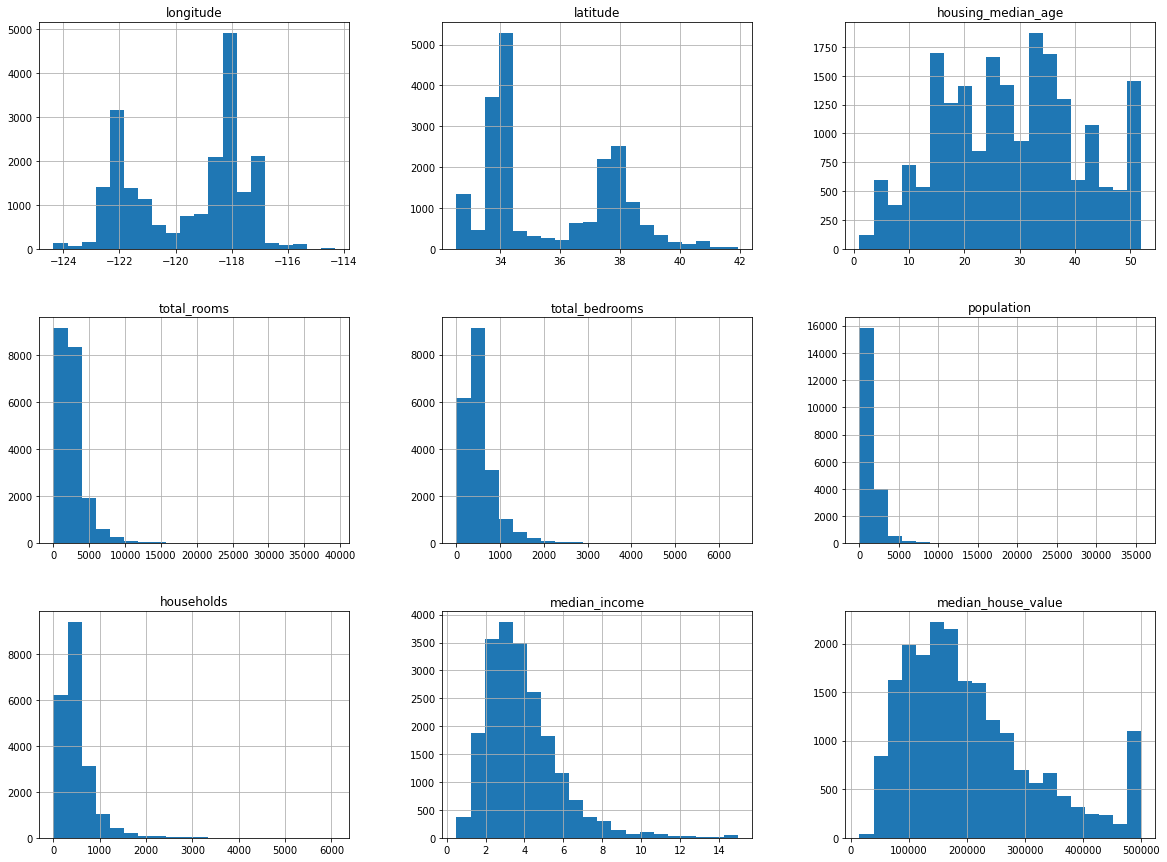

In [9]:
housing.hist(bins=20, figsize=(20,15))

# Create a test set

Instead of using <i>random sampling</i> using `sklearn.model_selection`'s `train_test_split` method, we could use <i>strarified sampling</i>. Suppose we know that `median_income` is a very important attribute to predict `median_house_value`. we have to make sure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, we first need to create
an income category attribute.

<AxesSubplot:>

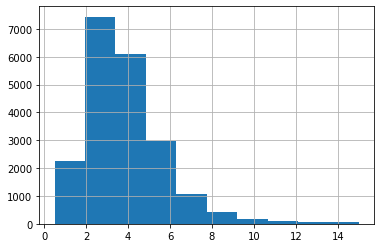

In [10]:
housing["median_income"].hist()

It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

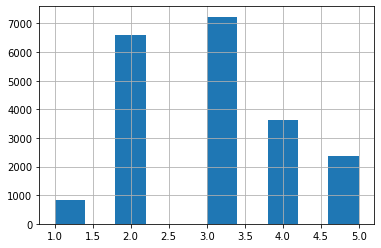

In [12]:
housing["income_cat"].hist()

Next block of code will pick train index and test index according to proportion of each category in `income_cat` attribute. We use these indices to split the dataset into train and test sets.

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [14]:
train_index

array([17606, 18632, 14650, ..., 13908, 11159, 15775], dtype=int64)

In [15]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [16]:
train_set["income_cat"].value_counts() / len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [17]:
test_set["income_cat"].value_counts() / len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [18]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

As can be seen, category proportion of train set and test set are very close to the entire data set.
Now we should remove the `income_cat` attribute so the data is back to its original
state:

In [19]:
train_set.drop("income_cat", axis=1, inplace=True)
test_set.drop("income_cat", axis=1, inplace=True)

In [20]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


# Discovering and visualizing the data to gain insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

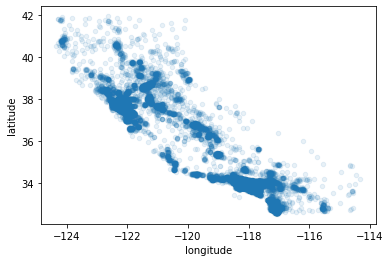

In [21]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

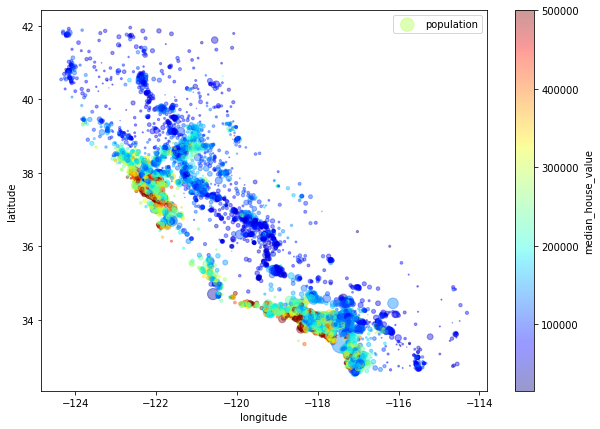

In [22]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=train_set["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

# Looking for correlation

In [23]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### Attribute Combination

In [24]:
train_set["rooms_per_household"] = train_set["total_rooms"] / train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"] / train_set["total_rooms"]
train_set["population_per_household"] = train_set["population"] / train_set["households"]

In [25]:
test_set["rooms_per_household"] = test_set["total_rooms"] / test_set["households"]
test_set["bedrooms_per_room"] = test_set["total_bedrooms"] / test_set["total_rooms"]
test_set["population_per_household"] = test_set["population"] / test_set["households"]

In [26]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Data cleaning

In [27]:
train_set_X = train_set.drop("median_house_value", axis=1)
train_set_Y = train_set["median_house_value"]

In [28]:
train_set_X_numeric = train_set_X.select_dtypes(include=[np.number])

In [29]:
imputer = SimpleImputer(strategy="median")

In [30]:
imputer.fit(train_set_X_numeric)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [32]:
train_set_X_numeric.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [33]:
numpy_array = imputer.transform(train_set_X_numeric)

In [34]:
train_set_X_numeric_imputed = pd.DataFrame(numpy_array, columns=train_set_X_numeric.columns,
                          index=train_set_X_numeric.index)

In [35]:
train_set_X_numeric_imputed.total_bedrooms.isnull().any()

False

In [36]:
train_set_X_numeric_imputed.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [37]:
train_set_X_categorical = train_set_X.select_dtypes(exclude=[np.number])

In [38]:
train_set_X_categorical.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [39]:
categorical_encoder = OneHotEncoder(sparse=False)

In [40]:
train_set_X_categorical_encoded = categorical_encoder.fit_transform(train_set_X_categorical)

In [41]:
train_set_X_categorical_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [42]:
categorical_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Alternitively, we could use pipelines for prepocessing the data.
First let's copy the train set once again:

In [43]:
train_set_X = train_set.drop("median_house_value", axis=1)
train_set_Y = train_set["median_house_value"]

In [44]:
numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [45]:
categorical_pipeline = Pipeline([
        ('1hotEncoder', OneHotEncoder(sparse=False)),
    ])

In [46]:
full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, train_set_X_numeric.columns.tolist()),
        ("cat", categorical_pipeline, train_set_X_categorical.columns.tolist()),
    ])


In [47]:
numpy_array = full_pipeline.fit_transform(train_set_X)

In [48]:
numpy_array.shape

(16512, 16)

Output of our pipeline is a `numpy_array`. To convert it back to a DataFrame:

In [49]:
train_set_X_prepared = pd.DataFrame(
    numpy_array,
    columns=list(train_set_X_numeric.columns) + [column_name for column_name in categorical_encoder.categories_[0]],
    index=train_set_X.index)
train_set_X_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.193805,-0.086499,1.0,0.0,0.0,0.0,0.0
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.940745,-0.033534,1.0,0.0,0.0,0.0,0.0
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.499160,-0.092405,0.0,0.0,0.0,0.0,1.0
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.208675,0.089736,0.0,1.0,0.0,0.0,0.0
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.324937,-0.004194,1.0,0.0,0.0,0.0,0.0


In [50]:
train_set_X_prepared.shape

(16512, 16)

# Selecting and training a model 

### LinearRegression

In [51]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_set_X_prepared, train_set_Y)

LinearRegression()

In [52]:
train_set_X_predictions = linear_regression_model.predict(train_set_X_prepared)
print("Predictions:", train_set_X_predictions)

Predictions: [209375.74268037 315154.78319184 210238.27856353 ...  93211.55696326
 211228.13313392 275603.28138472]


In [53]:
linear_regression_mse = mean_squared_error(train_set_Y, train_set_X_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)
print("Linear Regression RMSE:", linear_regression_rmse)

Linear Regression RMSE: 68161.22644433199


In [54]:
linear_regression_mae = mean_absolute_error(train_set_Y, train_set_X_predictions)
print("Linear Regression MAE:", linear_regression_mae)

Linear Regression MAE: 49060.06187000428


With 10-fold Cross Validation:

In [55]:
linear_regression_scores = cross_val_score(linear_regression_model, train_set_X_prepared, train_set_Y,
                             scoring="neg_mean_squared_error", cv=10)
linear_regression_rmse_scores = np.sqrt(-linear_regression_scores)
print("Scores:", linear_regression_rmse_scores)
print("Mean:", linear_regression_rmse_scores.mean())
print("Standard deviation:", linear_regression_rmse_scores.std())

Scores: [66060.65470195 66764.30726969 67721.72734022 74719.28193624
 68058.11572078 70909.35812986 64171.66459204 68075.65317717
 71024.84033989 67300.24394751]
Mean: 68480.58471553595
Standard deviation: 2845.584309265081


### DecisionTree

In [56]:
decision_tree_regressor_model = DecisionTreeRegressor(random_state=42)
decision_tree_regressor_model.fit(train_set_X_prepared, train_set_Y)

DecisionTreeRegressor(random_state=42)

In [57]:
train_set_X_predictions = decision_tree_regressor_model.predict(train_set_X_prepared)
print("Predictions:", train_set_X_predictions)

Predictions: [286600. 340600. 196900. ...  97800. 225900. 500001.]


In [58]:
decision_tree_regressor_mse = mean_squared_error(train_set_Y, train_set_X_predictions)
decision_tree_regressor_rmse = np.sqrt(decision_tree_regressor_mse)
print("Decision Tree RMSE:", decision_tree_regressor_rmse)

Decision Tree RMSE: 0.0


In [59]:
decision_tree_regressor_mae = mean_absolute_error(train_set_Y, train_set_X_predictions)
print("Decision Tree MAE:", decision_tree_regressor_mae)

Decision Tree MAE: 0.0


With 10-fold Cross Validation:

In [60]:
decision_tree_scores = cross_val_score(decision_tree_regressor_model, train_set_X_prepared, train_set_Y,
                             scoring="neg_mean_squared_error", cv=10)
decision_tree_rmse_scores = np.sqrt(-decision_tree_scores)
print("Scores:", decision_tree_rmse_scores)
print("Mean:", decision_tree_rmse_scores.mean())
print("Standard deviation:", decision_tree_rmse_scores.std())

Scores: [71286.53010048 67655.2680199  70658.07956912 69018.26351862
 69501.0146324  74753.61107685 70116.40461258 70562.89801774
 76246.00541282 70554.81392296]
Mean: 71035.2888883461
Standard deviation: 2456.17961798448


### RandomForest

In [61]:
random_forest_regressor_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor_model.fit(train_set_X_prepared, train_set_Y)

RandomForestRegressor(random_state=42)

In [62]:
train_set_X_predictions = random_forest_regressor_model.predict(train_set_X_prepared)
print("Predictions:", train_set_X_predictions)

Predictions: [264716.   333583.02 218840.   ... 105669.   212347.   460374.67]


In [63]:
random_forest_regressor_mse = mean_squared_error(train_set_Y, train_set_X_predictions)
random_forest_regressor_rmse = np.sqrt(random_forest_regressor_mse)
print("Random Forest RMSE:", random_forest_regressor_rmse)

Random Forest RMSE: 18622.301465360608


In [64]:
random_forest_regressor_mae = mean_absolute_error(train_set_Y, train_set_X_predictions)
print("Random Forest MAE:", random_forest_regressor_mae)

Random Forest MAE: 12090.284735949612


With 10-fold Cross Validation:

In [65]:
random_forest_scores = cross_val_score(random_forest_regressor_model, train_set_X_prepared, train_set_Y,
                             scoring="neg_mean_squared_error", cv=10)
random_forest_rmse_scores = np.sqrt(-random_forest_scores)
print("Scores:", random_forest_rmse_scores)
print("Mean:", random_forest_rmse_scores.mean())
print("Standard deviation:", random_forest_rmse_scores.std())

Scores: [49479.27767831 47447.67864811 49748.20862283 52414.0149022
 49458.59642664 53384.76968905 48760.27849117 47662.6216024
 53276.25370735 50119.36137562]
Mean: 50175.10611436802
Standard deviation: 2046.1636717401084


### SupportVectorMachine

In [66]:
support_vector_machine_model = SVR(kernel="linear")
support_vector_machine_model.fit(train_set_X_prepared, train_set_Y)

SVR(kernel='linear')

In [67]:
train_set_X_predictions = support_vector_machine_model.predict(train_set_X_prepared)
print("Predictions:", train_set_X_predictions)

Predictions: [175452.88637056 190855.51689569 175496.55324409 ... 176347.35688714
 183793.54292356 181641.16577409]


In [68]:
support_vector_machine_mse = mean_squared_error(train_set_Y, train_set_X_predictions)
support_vector_machine_rmse = np.sqrt(support_vector_machine_mse)
print("SVM RMSE:", support_vector_machine_rmse)

SVM RMSE: 110981.41510737606


In [69]:
support_vector_machine_mae = mean_absolute_error(train_set_Y, train_set_X_predictions)
print("SVM MAE:", support_vector_machine_mae)

SVM MAE: 81771.08281548628


With 10-fold Cross Validation:

In [70]:
support_vector_machine_scores = cross_val_score(support_vector_machine_model, train_set_X_prepared, train_set_Y,
                             scoring="neg_mean_squared_error", cv=10)
support_vector_machine_rmse_scores = np.sqrt(-support_vector_machine_scores)
print("Scores:", support_vector_machine_rmse_scores)
print("Mean:", support_vector_machine_rmse_scores.mean())
print("Standard deviation:", support_vector_machine_rmse_scores.std())

Scores: [105274.53587937 112403.32270448 109967.47555988 113298.27790176
 110572.31211964 115561.55204947 110592.44130321 114389.07546348
 113648.6084577  111403.88738757]
Mean: 111711.14888265522
Standard deviation: 2754.3053045240267


# Fine-Tunning the models

### Grid Search

In [71]:
random_forest_regressor_model = RandomForestRegressor(random_state=42)

param_grid = [
    # first try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(random_forest_regressor_model, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_set_X_prepared, train_set_Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [73]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [74]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

64458.66853779902 {'max_features': 2, 'n_estimators': 3}
55692.15112480984 {'max_features': 2, 'n_estimators': 10}
53128.75357634392 {'max_features': 2, 'n_estimators': 30}
61141.87524747239 {'max_features': 4, 'n_estimators': 3}
52459.842225837754 {'max_features': 4, 'n_estimators': 10}
50287.355787011526 {'max_features': 4, 'n_estimators': 30}
57813.40564428136 {'max_features': 6, 'n_estimators': 3}
51708.54909893283 {'max_features': 6, 'n_estimators': 10}
49845.948499402984 {'max_features': 6, 'n_estimators': 30}
58767.58483512346 {'max_features': 8, 'n_estimators': 3}
51621.64308941378 {'max_features': 8, 'n_estimators': 10}
49708.15638794743 {'max_features': 8, 'n_estimators': 30}
62286.58800554182 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54353.33538110372 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57962.664183069915 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52039.03872923619 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [75]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178187,0.007624,0.012501,0.006251,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.921397e+09,-4.462251e+09,...,-4.154920e+09,2.158492e+08,18,-1.140700e+09,-1.096688e+09,-1.155825e+09,-1.105864e+09,-1.119156e+09,-1.123647e+09,2.186054e+07
1,0.569212,0.006461,0.035396,0.004120,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.851336e+09,-3.233690e+09,...,-3.101616e+09,1.649479e+08,11,-5.805542e+08,-5.613257e+08,-5.837845e+08,-5.909281e+08,-5.807923e+08,-5.794769e+08,9.818775e+06
2,1.556618,0.130551,0.079499,0.005327,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.593360e+09,-2.956207e+09,...,-2.822664e+09,1.603902e+08,9,-4.333529e+08,-4.272905e+08,-4.338232e+08,-4.450133e+08,-4.374254e+08,-4.353811e+08,5.813038e+06
3,0.260911,0.006203,0.014466,0.002316,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.562647e+09,-3.917702e+09,...,-3.738329e+09,1.338772e+08,16,-9.760618e+08,-9.891111e+08,-9.741356e+08,-9.820921e+08,-9.922920e+08,-9.827385e+08,7.083591e+06
4,0.824935,0.040848,0.037931,0.009037,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.653247e+09,-2.851414e+09,...,-2.752035e+09,1.035013e+08,8,-5.077665e+08,-5.068916e+08,-4.969869e+08,-5.186340e+08,-5.144831e+08,-5.089524e+08,7.391196e+06
5,3.138558,0.380692,0.108455,0.012910,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.335654e+09,-2.661831e+09,...,-2.528818e+09,1.462663e+08,3,-3.887132e+08,-3.900841e+08,-3.869326e+08,-3.960261e+08,-3.895892e+08,-3.902690e+08,3.072203e+06
6,0.361941,0.007519,0.012853,0.008046,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.251844e+09,-3.225451e+09,...,-3.342390e+09,1.427868e+08,12,-8.976358e+08,-8.527542e+08,-8.799753e+08,-9.191197e+08,-8.987854e+08,-8.896541e+08,2.222877e+07
7,1.201846,0.027211,0.031009,0.005588,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.576426e+09,-2.675579e+09,...,-2.673774e+09,9.728074e+07,6,-4.777235e+08,-4.713661e+08,-4.749802e+08,-5.129763e+08,-4.910736e+08,-4.856239e+08,1.521081e+07
8,3.277058,0.482627,0.082010,0.008949,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.341452e+09,-2.538561e+09,...,-2.484619e+09,1.229957e+08,2,-3.717781e+08,-3.729273e+08,-3.706835e+08,-3.920180e+08,-3.879456e+08,-3.790705e+08,9.029549e+06
9,0.432672,0.012320,0.019165,0.004353,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.213025e+09,-3.577796e+09,...,-3.453629e+09,1.863238e+08,15,-9.121832e+08,-9.055742e+08,-8.912672e+08,-9.157552e+08,-9.109544e+08,-9.071468e+08,8.586057e+06


### Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.

In [76]:
random_forest_regressor_model = RandomForestRegressor(random_state=42)
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

randomized_search = RandomizedSearchCV(random_forest_regressor_model, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
randomized_search.fit(train_set_X_prepared, train_set_Y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCADD95A90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCADD95AC8>},
                   random_state=42, scoring='neg_mean_squared_error')

In [77]:
randomized_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [78]:
randomized_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [79]:
cv_results = randomized_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

49091.43025494326 {'max_features': 7, 'n_estimators': 180}
52033.36431356812 {'max_features': 5, 'n_estimators': 15}
50532.53283772523 {'max_features': 3, 'n_estimators': 72}
50721.30691769598 {'max_features': 5, 'n_estimators': 21}
49161.42656009366 {'max_features': 7, 'n_estimators': 122}
50521.931261410034 {'max_features': 3, 'n_estimators': 75}
50398.64055081575 {'max_features': 3, 'n_estimators': 88}
49573.951024682065 {'max_features': 5, 'n_estimators': 100}
50266.46737353017 {'max_features': 3, 'n_estimators': 150}
66271.23236410116 {'max_features': 5, 'n_estimators': 2}


In [80]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.76176095e-02, 5.91026478e-02, 4.28232848e-02, 1.60259053e-02,
       1.46546897e-02, 1.55615897e-02, 1.46071863e-02, 3.72603755e-01,
       5.06891867e-02, 6.12268291e-02, 1.13515409e-01, 7.01392026e-03,
       1.59145641e-01, 7.57140630e-05, 1.85167609e-03, 3.48495547e-03])

In [81]:
sorted(zip(feature_importances, train_set_X_prepared.columns), reverse=True)

[(0.3726037550029671, 'median_income'),
 (0.1591456409796966, 'INLAND'),
 (0.11351540922091989, 'population_per_household'),
 (0.06761760950204279, 'longitude'),
 (0.06122682905969682, 'bedrooms_per_room'),
 (0.05910264780002197, 'latitude'),
 (0.050689186697425656, 'rooms_per_household'),
 (0.04282328484209212, 'housing_median_age'),
 (0.016025905343031947, 'total_rooms'),
 (0.015561589661685757, 'population'),
 (0.014654689653403379, 'total_bedrooms'),
 (0.014607186349783353, 'households'),
 (0.007013920263280008, '<1H OCEAN'),
 (0.0034849554703658397, 'NEAR OCEAN'),
 (0.001851676090537374, 'NEAR BAY'),
 (7.571406304943622e-05, 'ISLAND')]

# Evaluating best model on the Test set

In [82]:
test_set_X = test_set.drop("median_house_value", axis=1)
test_set_Y = test_set["median_house_value"]

In [83]:
test_set_X_numeric = test_set_X.select_dtypes(include=[np.number])

Note that we should call `transform()`, not `fit_transform()`. Because we do not want to fit the test set.

In [84]:
numpy_array = full_pipeline.transform(test_set_X)

In [85]:
numpy_array.shape

(4128, 16)

Output of our pipeline is a `numpy_array`. To convert the numpy_array back to a DataFrame:

In [86]:
test_set_X_prepared = pd.DataFrame(
    numpy_array,
    columns=list(test_set_X_numeric.columns) + [column_name for column_name in categorical_encoder.categories_[0]],
    index=test_set_X.index)
test_set_X_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,0.592384,-0.710749,0.027588,1.788385,1.163511,0.684989,1.232174,2.312998,0.488309,-0.977257,-0.070908,1.0,0.0,0.0,0.0,0.0
10970,0.857146,-0.874454,0.822858,0.718423,0.294532,0.223375,0.409730,0.386117,0.363103,-0.968195,-0.045983,1.0,0.0,0.0,0.0,0.0
20351,0.262681,-0.668654,-0.131466,0.811016,0.954177,0.618660,1.008597,-0.453406,-0.178661,-0.004416,-0.059369,1.0,0.0,0.0,0.0,0.0
6568,0.712276,-0.673331,1.856709,-0.391288,-0.554973,-0.360140,-0.465946,0.145001,0.040681,-0.725808,0.005616,0.0,1.0,0.0,0.0,0.0
13285,0.947065,-0.734136,0.266169,-0.396432,-0.535500,-0.316219,-0.519179,0.084997,0.167383,-0.628298,0.037695,0.0,1.0,0.0,0.0,0.0


In [87]:
test_set_X_prepared.shape

(4128, 16)

In [88]:
final_model = randomized_search.best_estimator_

final_predictions = final_model.predict(test_set_X_prepared)

final_mse = mean_squared_error(test_set_Y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

46784.413541639624

We can compute a 95% confidence interval for the test RMSE:

In [89]:
confidence = 0.95
squared_errors = (final_predictions - test_set_Y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([44818.90615083, 48670.61076578])

Alternatively, we could use a z-scores rather than t-scores:

In [90]:
m = len(squared_errors)
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(squared_errors.mean() - zmargin), np.sqrt(squared_errors.mean() + zmargin)

(44819.49522692047, 48670.0683015173)

# Saving the final model

In [91]:
joblib.dump(final_model, "my_model.pkl")
# Later we can use the following line to load our model
# my_model_loaded = joblib.load("my_model.pkl")

['my_model.pkl']